# Ring colocalization

<b>Analysis of dual-color STED images.</b><br>

Code used to determine the relative positions of two ring-like structures (no circle-fitting involved).<br><br>
<b>Method: </b>
<ol>
<li> Select the dominant channel.
<li> Locate the center of object in the dominant channel.
<li> Draw a horizontal line to determine the positions (left and right) of the structure in the dominant channel relative to the object center.
<li> Determine the signal of the non-dominant channel and calibrate its position relative to the dominant channel.
<li> Rotate both structures and repeat steps (3) and (4) to determine the relative positions along the entire ring.
<li> Sum up the line profiles to determine the relative position of the non-dominant structure compared to the dominant structure.
</ol>
        
This code  has been implemented to determine the relative positions of ESCRT-III proteins during cell division in the archaea <i>Sulfolobus acidocaldarius</i>:<br>
Hurtig, F., Burgers, T.C.Q., Cezanne, A., Jiang, X., Mol, F.N., Traparić, J., Tarrason-Risa, G., Pulschen, A.A., Harker-Kirschneck, L, Šarić, A.,<br> Vlijm, R. & Baum, B.<br>
<i>The patterned assembly and stepwise Vps4-mediated disassembly
of composite ESCRT-III polymers drives archaeal cell division.</i><br>
BioRxiv (2022) <a href="https://doi.org:10.1101/2022.09.16.508273">https://doi.org:10.1101/2022.09.16.508273</a><br>

<b>Script developed by:</b><br>
<a href="https://www.rug.nl/staff/frank.mol/">Frank N. Mol</a> & 
<a href="https://www.rug.nl/staff/r.vlijm/">Rifka Vlijm</a> <br>
<a href="https://www.rug.nl/research/zernike/molecular-biophysics/">Molecular Biophysics</a> - 
<a href="https://www.rug.nl/research/zernike/molecular-biophysics/vlijm-group/">Vlijm Group</a><br>
<a href="https://www.rug.nl/research/zernike/">Zernike Institute of Advanced Materials</a><br>
<a href="https://www.rug.nl/">University of Groningen</a><br>

`ring_colocalization.ipynb` is the notebook which contains the complete computation of the colocalization of two ring-like structures.<br>
`ring_analysis/parameters.py` is the Python 3.x file which contains the parameters. Adjust this file conform the used data.<br>
`data` is the folder in which all data which needs to be analyzed must be stored. <br>
The images need to be of `.tiff` format, consisting two layers of images (i.e. (2, ..., ...) dimension images).<br>
The example image used (which can be found in `data`) is an image from the above mentioned study. The example image is a 16bit `.tiff` file containing CdvB in the first channel and CdvB1 in the second channel. No adjustments have to be made to use other bit sized `.tiff` data.


### Import functions & parameters

In [1]:
from ring_analysis import display_all_images, compute_line_profiles, peak2peak, load_parameters
p = load_parameters()

### Display the images in the folder

Check if the dataset is correct.

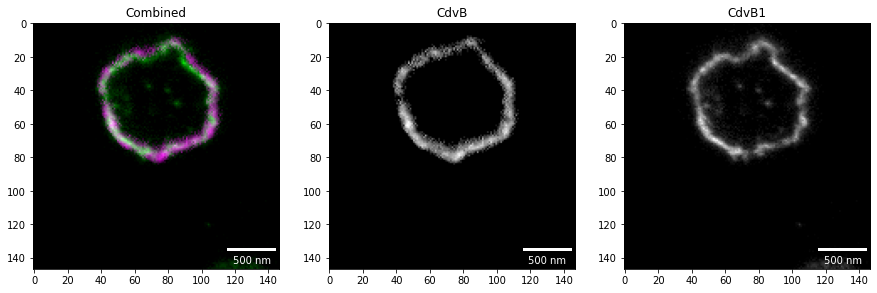

In [2]:
if p.display_images: display_all_images(p)

### Obtain the line profiles

Calculates the peak position of the signal in the dominant channel, and uses this position to draw the line profiles of each channel relative to the determined peak position of the dominant channel.<br>
The determined peak positions can be reviewed by setting the display parameter to `True`

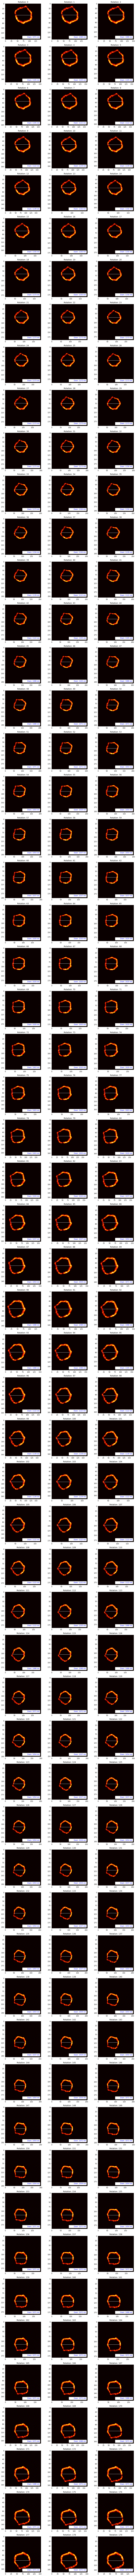

In [3]:
line_profiles = compute_line_profiles(p)

### Sum the line profiles for each channel seperately  and generate the intensity plot

x-axis is the position (nm) relative to the peak position in the dominant channel. The data is min-max normalized. The displayed line is a cubic interpolation of the obtained data.

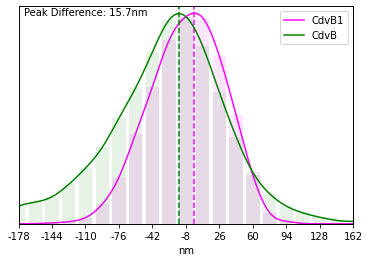

In [4]:
peak2peak(p, line_profiles)